#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("anonymized_all.csv")
df2 = pd.read_csv("anonymized_fy24_only.csv")

In [3]:
df1.head()

In [4]:
df2.head()

In [5]:
def clean_df(df, date_col, drop_col):
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.drop([drop_col], axis = 1)
    df.columns = df.columns.str.lower()
    
    return df

cleaned_df1 = clean_df(df1,'Start Date', 'Client Name')
cleaned_df2 = clean_df(df2,'Start Date', 'Client Name')

In [6]:
cleaned_df1.head()

In [7]:
def fiscal_year(date):
    if date.month >=7:
        return date.year + 1
    else:
        return date.year
    
cleaned_df1['fiscal year'] = cleaned_df1['start date'].apply(fiscal_year)
cleaned_df2['fiscal year'] = cleaned_df2['start date'].apply(fiscal_year)

In [8]:
cleaned_df1['fiscal year'].unique()

array([2021, 2022, 2023, 2024])

In [9]:
cleaned_df2['fiscal year'].unique()

array([2024])

In [10]:
# <!-- ```{python}
# merged_df = pd.merge(cleaned_all, cleaned_fy24, how = 'outer')
# merged_df
# ```



# ```{python}
# merged_df['fiscal year'] = merged_df['start date'].apply(get_fiscal_year)
# merged_df.head()
# ```
# ```{python}
# merged_df['fiscal year'].unique()
# ```

# ```{python}
# merged_df = merged_df[merged_df['fiscal year'].isin([2023, 2024])]
# merged_df
# ```

# ```{python}
# weekly_performance = (
#   merged_df
#   .groupby(['fiscal year', pd.Grouper(key='start date', freq='W')]).size()
#   .reset_index(name = 'weekly_performance')
# )

# weekly_performance
# ```

# ```{python}
# weekly_performance['cumulative_performance'] = (
#   weekly_performance
#   .groupby('fiscal year')['weekly_performance']
#   .cumsum()
# )

# weekly_performance
# ```
# ```{python}
# # Pivot the data
# weekly_performance['start date'] = weekly_performance['start date'].dt.strftime('%m-%d')

# pivoted_data = weekly_performance.pivot(index='start date', columns='fiscal year', values='cumulative_performance')
# pivoted_data.columns = [f'Cumulative Performance FY{year}' for year in pivoted_data.columns]

# pivoted_data.reset_index(inplace=True)

# pivoted_data
# ```
# ```{python}
# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# pivoted_data.plot(x='start date', ax=ax)

# ax.set_title('Cumulative Weekly Performance by Fiscal Year')
# ax.set_xlabel('Date')
# ax.set_ylabel('Cumulative Performance')
# ax.legend()

# plt.show()
# ```
# ```{python}
# weekly_performance.to_csv("weekly_performance.csv", index = False) 
# ``` -->


In [11]:
cleaned_previous = cleaned_df1[cleaned_df1['fiscal year'].isin([2024])]
cleaned_previous

2633 rows × 4 columns

In [12]:
previous_weekly_performance = (
  cleaned_previous
  .groupby(['fiscal year', pd.Grouper(key='start date', freq='W')]).size()
  .reset_index(name = 'previous_weekly_performance')
)
previous_weekly_performance.head()

In [13]:
previous_weekly_performance['previous_cumulative_performance'] = (
  previous_weekly_performance
  .groupby('fiscal year')['previous_weekly_performance']
  .cumsum()
)
previous_weekly_performance.head()

In [14]:
current_weekly_performance = (
  cleaned_df2
  .groupby(['fiscal year', pd.Grouper(key='start date', freq='W')]).size()
  .reset_index(name = 'current_weekly_performance')
)
current_weekly_performance.head()

In [15]:
current_weekly_performance['current_cumulative_performance']= (
  current_weekly_performance
  .groupby('fiscal year')['current_weekly_performance']
  .cumsum()
)
current_weekly_performance.head()

In [16]:
merged_df = pd.merge(previous_weekly_performance, current_weekly_performance, how = 'outer')
merged_df.head()

In [17]:
merged_df.to_csv("weekly_performance.csv", index = False)

``` python
# Plotting 1
# Set 'start date' as the index for better plotting
merged_df.set_index('start date', inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Positions of the bars
index = range(len(merged_df))

# Plotting 'previous_weekly_performance'
bars1 = ax.bar(index, merged_df['previous_weekly_performance'], width=bar_width, label='Previous Weekly Performance', color='b')

# Plotting 'current_weekly_performance' shifted right by bar_width to place next to the previous
bars2 = ax.bar([p + bar_width for p in index], merged_df['current_weekly_performance'], width=bar_width, label='Current Weekly Performance', color='r')

# Adding labels, title, and legend
ax.set_xlabel('Start Date')
ax.set_ylabel('Weekly Performance')
ax.set_title('Comparison of Previous and Current Weekly Performance')
ax.legend()

# Set x-ticks to be in the middle of the two bars for each date
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(merged_df.index.strftime('%Y-%m-%d'), rotation=45)

plt.show()


# Plotting 2
# Resetting the index to put 'start date' back as a regular column
merged_df.reset_index(inplace=True)


plt.figure(figsize=(10, 6))

# Plotting the 'previous_cumulative_performance'
plt.plot(merged_df['start date'], merged_df['previous_cumulative_performance'], label='Previous Cumulative Performance', marker='o')

# Plotting the 'current_cumulative_performance'
plt.plot(merged_df['start date'], merged_df['current_cumulative_performance'], label='Current Cumulative Performance', marker='o')
 
plt.title('Comparison of Previous and Current Cumulative Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Cumulative Performance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotates the dates on the x-axis for better visibility
plt.tight_layout()  # Adjusts plot parameters to give some padding and prevent overlap

plt.show()
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-line-chart-1">
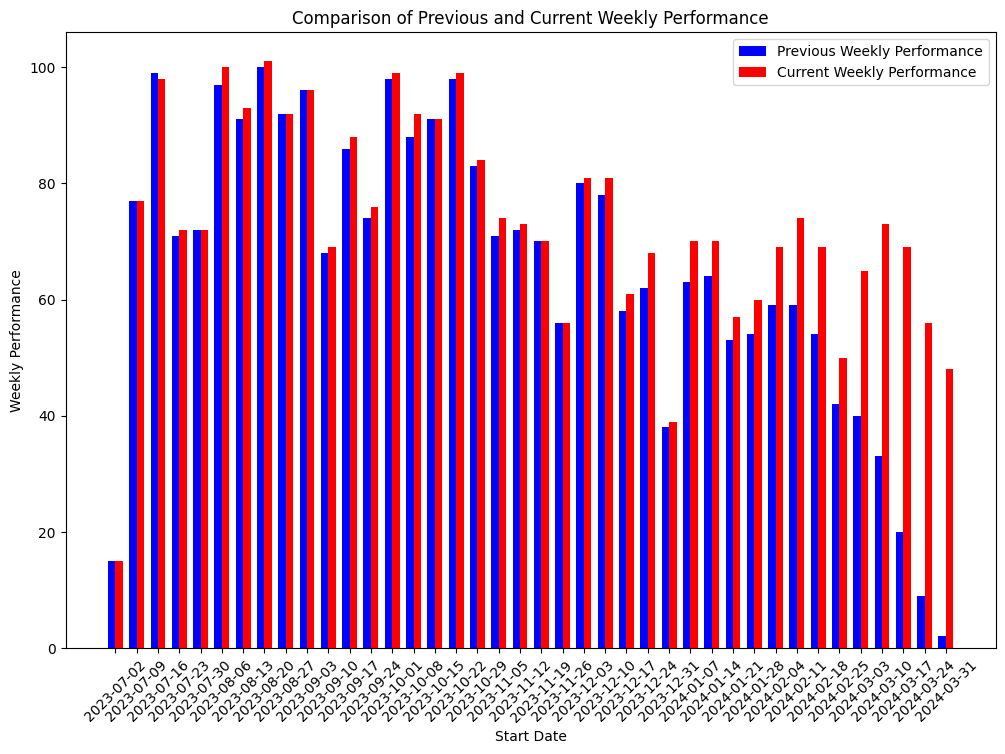
<figcaption>(a) The bar chart shows weekly performance trends for
previous and current periods, highlighting fluctuations and potential
seasonal patterns. This dense representation helps identify key
variations but can be visually complex.</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-line-chart-2">
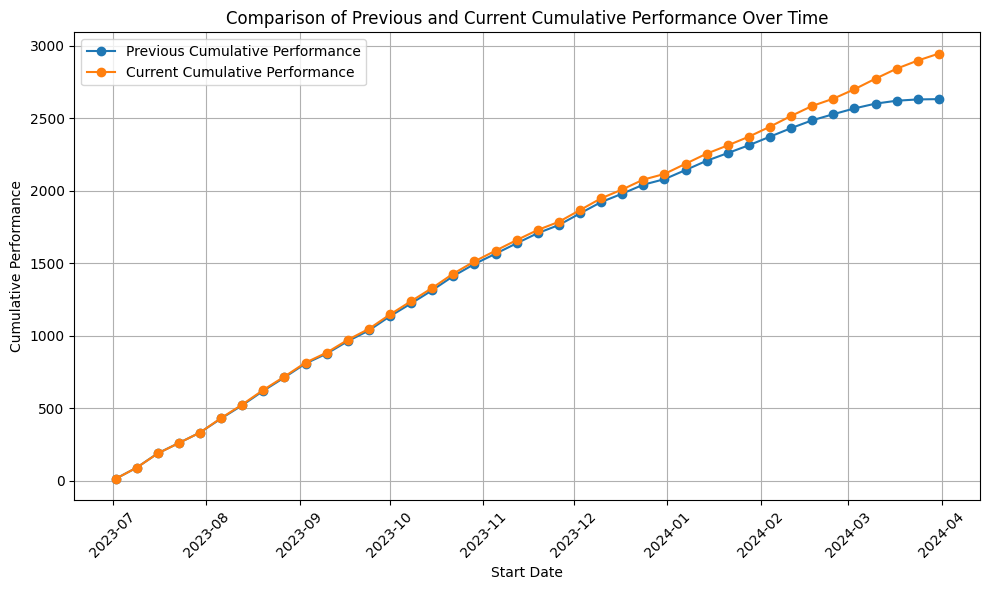
<figcaption>(b) The line chart offers a clearer view of performance over
time by smoothing out weekly noise and emphasizing long-term
trends.</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 1: Initial stages of the data visualization workflow, creating
basic plots to explore and refine key trends